In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

In [2]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Handling Null Value

In [4]:
df['holiday'].fillna('None', inplace=True)

C:\Users\sanja\AppData\Local\Temp\ipykernel_5668\3649264734.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['holiday'].fillna('None', inplace=True)


In [5]:
df['holiday'].value_counts()

holiday
None                         48143
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
New Years Day                    6
Veterans Day                     5
Columbus Day                     5
Memorial Day                     5
Washingtons Birthday             5
State Fair                       5
Independence Day                 5
Name: count, dtype: int64

In [6]:
df["hour"] = pd.to_datetime(df["date_time"]).dt.hour

In [7]:
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13
...,...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,19
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,21
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,22


In [11]:
df_weather = df.groupby("weather_description")["traffic_volume"].sum().reset_index()

# Sort by traffic volume (descending)
df_weather = df_weather.sort_values(by="traffic_volume", ascending=False)

# Horizontal bar chart
fig = px.bar(df_weather, 
             x="traffic_volume", 
             y="weather_description", 
             orientation="h",  # Horizontal bars
             title="🚦 Traffic Volume in Different Weather Conditions",
             text_auto=True,  # Display values
             color="traffic_volume", 
             color_continuous_scale="oranges")  # Match color theme

# Display in Streamlit
st.subheader("🚦 Traffic Volume in Different Weather Conditions")
st.plotly_chart(fig, use_container_width=True)

2025-03-28 09:22:21.025 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 09:22:21.711 
  command:

    streamlit run C:\Projects\Personel_Project\Traffic_Congestion_Prediction\pythonProject\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-28 09:22:21.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 09:22:21.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 09:22:21.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 09:22:21.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 09:22:21.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare

DeltaGenerator()

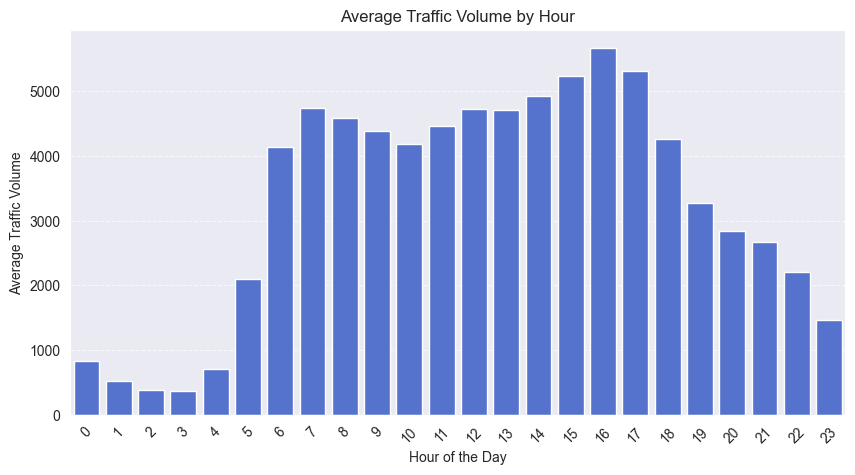

In [18]:
# Aggregate data
df_hourly = df.groupby("hour")["traffic_volume"].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_hourly, x="hour", y="traffic_volume", color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.title("Average Traffic Volume by Hour")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [19]:
import networkx as nx
import folium
from streamlit_folium import folium_static
import streamlit as st

# Define key locations along I-94 in Minnesota (latitude, longitude)
nodes = {
    "Fargo": (46.8772, -96.7898),
    "Alexandria": (45.8848, -95.3777),
    "St. Cloud": (45.5608, -94.1625),
    "Minneapolis": (44.9778, -93.2650),
    "St. Paul": (44.9537, -93.0900),
    "Woodbury": (44.9239, -92.9594),
}

# Define edges between the locations (representing I-94 highway segments)
edges = [
    ("Fargo", "Alexandria"),
    ("Alexandria", "St. Cloud"),
    ("St. Cloud", "Minneapolis"),
    ("Minneapolis", "St. Paul"),
    ("St. Paul", "Woodbury"),
]

# Create a directed graph
G = nx.DiGraph()
for node, coords in nodes.items():
    G.add_node(node, pos=coords)
for edge in edges:
    G.add_edge(*edge)

# Create a Folium map centered around Minnesota
m = folium.Map(location=[45.0, -94.0], zoom_start=7)

# Add nodes to the map
for node, (lat, lon) in nodes.items():
    folium.Marker([lat, lon], popup=node, icon=folium.Icon(color='blue')).add_to(m)

# Add edges to the map
for edge in edges:
    loc1, loc2 = edge
    folium.PolyLine([nodes[loc1], nodes[loc2]], color="red", weight=5).add_to(m)

# Display the map in Streamlit
st.title("Interstate 94 (I-94) Graph in Minnesota")
folium_static(m)


2025-03-27 15:47:02.451 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 15:47:02.455 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 15:47:02.586 
  command:

    streamlit run C:\Projects\Personel_Project\Traffic_Congestion_Prediction\pythonProject\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-27 15:47:02.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\sanja\AppData\Local\Temp\ipykernel_15484\1743364308.py:46: DeprecationWarning: 
folium_static is deprecated and will be removed in a future release, or
simply replaced with with st_folium which always passes
returned_objects=[] to the component.
Please try using st_folium instead, and
post an iss

DeltaGenerator()

In [12]:
df_holiday = df[df["holiday"] != "None"] 

In [13]:
df_holiday

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
126,Columbus Day,273.080,0.00,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455,0
1123,Veterans Day,288.120,0.00,0.0,87,Clear,sky is clear,2012-11-12 00:00:00,1000,0
1370,Thanksgiving Day,278.540,0.00,0.0,20,Mist,mist,2012-11-22 00:00:00,919,0
2360,Christmas Day,264.400,0.00,0.0,90,Clouds,overcast clouds,2012-12-25 00:00:00,803,0
2559,New Years Day,263.490,0.00,0.0,58,Clouds,broken clouds,2013-01-01 00:00:00,1439,0
...,...,...,...,...,...,...,...,...,...,...
44441,Memorial Day,299.487,0.00,0.0,24,Clouds,few clouds,2018-05-28 00:00:00,1088,0
45547,Independence Day,297.550,0.00,0.0,1,Mist,mist,2018-07-04 00:00:00,1021,0
46936,State Fair,289.020,0.00,0.0,1,Clear,sky is clear,2018-08-23 00:00:00,596,0
47330,Labor Day,292.430,0.25,0.0,1,Rain,light rain,2018-09-03 00:00:00,962,0


In [15]:
from tensorflow.keras.models import load_model

In [1]:
print('h')

h


In [3]:
import requests
import json

# Replace with your HERE Maps API Key
API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define the location (latitude, longitude)
latitude = 44.9778  # Minneapolis
longitude = -93.2650  # Minneapolis

# HERE Maps Traffic API Endpoint
url = url = f"https://traffic.ls.hereapi.com/traffic/6.3/flow.json?apiKey={API_KEY}&prox={latitude},{longitude},"

# Send GET request to the API
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    
    # Extract basic traffic information
    if "RWS" in data and data["RWS"]:
        for road in data["RWS"]:
            for flow_segment in road["RW"]:
                for flow_item in flow_segment["FIS"]:
                    for flow in flow_item["FI"]:
                        traffic_speed = flow["CF"][0]["SU"]  # Speed Uncongested
                        current_speed = flow["CF"][0]["SP"]  # Current Speed
                        jam_factor = flow["CF"][0]["JF"]  # Jam Factor
                        print(f"Traffic Speed: {traffic_speed} km/h")
                        print(f"Current Speed: {current_speed} km/h")
                        print(f"Jam Factor: {jam_factor} (0-10 scale)")
else:
    print("Failed to retrieve data", response.status_code)

Failed to retrieve data 401


In [4]:
import requests

# Define HERE API credentials
API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGp"
latitude = 52.51628   # Example: Berlin
longitude = 13.3777   # Example: Berlin
radius = 1000         # Search radius in meters

# HERE Traffic API Endpoint
url = f"https://traffic.ls.hereapi.com/traffic/6.3/flow.json?apiKey={API_KEY}&prox={latitude},{longitude},{radius}"

# Send GET request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    traffic_data = response.json()
    print(traffic_data)  # Display the raw traffic data
else:
    print("Error:", response.status_code, response.text)


Error: 401 {"error":"Unauthorized","error_description":"apiKey invalid. apiKey not found."}


In [6]:
import requests

TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

def get_traffic_volume(origin, destination):
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{origin}:{destination}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",  # Use real-time traffic
        "computeTravelTimeFor": "all",
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()

    # Debugging: Print response
    print(response)

    if "routes" in response:
        travel_time = response["routes"][0]["summary"]["trafficDelayInSeconds"]
        return travel_time // 60  # Convert to minutes

    return None


In [7]:
import folium
import requests

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "computeAlternativeRoutes": "true",
        "maxAlternatives": 5,
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Fetch all routes
routes = get_routes()

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Add routes to the map
colors = ["red", "blue", "green", "purple", "orange"]
for i, route in enumerate(routes):
    if "legs" in route:
        for leg in route["legs"]:
            polyline = []
            for point in leg["points"]:
                polyline.append((point["latitude"], point["longitude"]))
            folium.PolyLine(polyline, color=colors[i % len(colors)], weight=5,
                            popup=f"Route {i+1}").add_to(m)

# Save the map as an HTML file
m.save("minneapolis_st_paul_routes.html")

print("Map saved as 'minneapolis_st_paul_routes.html'. Open this file in a browser to view the routes.")

Map saved as 'minneapolis_st_paul_routes.html'. Open this file in a browser to view the routes.


In [13]:
import folium
import requests
from IPython.display import display
from folium import Map

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        #"computeAlternativeRoutes": "true",
        #"maxAlternatives": 5,
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    print(response)
    return response.get("routes", [])

# Fetch all routes
routes = get_routes()
print(len(routes))

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Add routes to the map
colors = ["red", "blue", "green", "purple", "orange"]
for i, route in enumerate(routes):
    if "legs" in route:
        for leg in route["legs"]:
            polyline = []
            for point in leg["points"]:
                polyline.append((point["latitude"], point["longitude"]))
            folium.PolyLine(polyline, color=colors[i % len(colors)], weight=5,
                            popup=f"Route {i+1}").add_to(m)

# Display the map in Jupyter Notebook
display(m)

{'formatVersion': '0.0.12', 'routes': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 936, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T05:53:46-05:00', 'arrivalTime': '2025-03-31T06:09:22-05:00'}, 'legs': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 936, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T05:53:46-05:00', 'arrivalTime': '2025-03-31T06:09:22-05:00'}, 'points': [{'latitude': 44.97777, 'longitude': -93.26503}, {'latitude': 44.97749, 'longitude': -93.26437}, {'latitude': 44.9769, 'longitude': -93.26302}, {'latitude': 44.97665, 'longitude': -93.26242}, {'latitude': 44.97643, 'longitude': -93.26192}, {'latitude': 44.97631, 'longitude': -93.26166}, {'latitude': 44.97618, 'longitude': -93.26177}, {'latitude': 44.97542, 'longitude': -93.26242}, {'latitude': 44.97532, 'longitude': -93.26249}, {'latitude': 44.97519, 'longitude': -93.2626}, {'latitude': 44.97441, 'longitude': -

In [17]:
import folium
import requests
from IPython.display import display
from folium import Map

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = (12.859242551718474, 80.08707634613808)
st_paul = (12.871761776077152, 80.07639492351841)

# Function to get all possible routes from TomTom API
def get_routes():
    # Format coordinates correctly in the URL
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis[0]},{minneapolis[1]}:{st_paul[0]},{st_paul[1]}/json"
    
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "routeType": "fastest",
        #"computeAlternativeRoutes": "true",  # Request alternative routes
        "maxAlternatives": 2,
        "travelMode": "car"
    }

    response = requests.get(url, params=params).json()
    print(response)
    return response.get("routes", [])

# Fetch all routes
routes = get_routes()
print(len(routes))

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[12.871761776077152, 80.07639492351841], zoom_start=11)

# Add routes to the map
colors = ["red", "blue", "green", "purple", "orange"]
for i, route in enumerate(routes):
    if "legs" in route:
        for leg in route["legs"]:
            polyline = []
            for point in leg["points"]:
                polyline.append((point["latitude"], point["longitude"]))
            folium.PolyLine(polyline, color=colors[i % len(colors)], weight=5,
                            popup=f"Route {i+1}").add_to(m)

# Display the map in Jupyter Notebook
display(m)

{'formatVersion': '0.0.12', 'routes': [{'summary': {'lengthInMeters': 3500, 'travelTimeInSeconds': 840, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T17:28:20+05:30', 'arrivalTime': '2025-03-31T17:42:20+05:30'}, 'legs': [{'summary': {'lengthInMeters': 3500, 'travelTimeInSeconds': 840, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T17:28:20+05:30', 'arrivalTime': '2025-03-31T17:42:20+05:30'}, 'points': [{'latitude': 12.85945, 'longitude': 80.08715}, {'latitude': 12.85942, 'longitude': 80.08746}, {'latitude': 12.85938, 'longitude': 80.08797}, {'latitude': 12.85938, 'longitude': 80.08802}, {'latitude': 12.85935, 'longitude': 80.08805}, {'latitude': 12.85933, 'longitude': 80.08807}, {'latitude': 12.8593, 'longitude': 80.08807}, {'latitude': 12.85915, 'longitude': 80.08807}, {'latitude': 12.85879, 'longitude': 80.08815}, {'latitude': 12.85864, 'longitude': 80.08815}, {'latitude': 12.85863, 'longitude': 80.08815}, {

In [18]:
import folium
import requests
from IPython.display import display
from folium import Map

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        #"computeAlternativeRoutes": "true",
        "maxAlternatives": 2,
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    print(response)
    return response.get("routes", [])

# Fetch all routes
routes = get_routes()
print(len(routes))

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Add routes to the map
colors = ["red", "blue", "green", "purple", "orange"]
for i, route in enumerate(routes):
    if "legs" in route:
        for leg in route["legs"]:
            polyline = []
            for point in leg["points"]:
                polyline.append((point["latitude"], point["longitude"]))
            folium.PolyLine(polyline, color=colors[i % len(colors)], weight=5,
                            popup=f"Route {i+1}").add_to(m)

# Display the map in Jupyter Notebook
display(m)

{'formatVersion': '0.0.12', 'routes': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 972, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T07:19:15-05:00', 'arrivalTime': '2025-03-31T07:35:27-05:00'}, 'legs': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 972, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T07:19:15-05:00', 'arrivalTime': '2025-03-31T07:35:27-05:00'}, 'points': [{'latitude': 44.97777, 'longitude': -93.26503}, {'latitude': 44.97749, 'longitude': -93.26437}, {'latitude': 44.97708, 'longitude': -93.26471}, {'latitude': 44.97653, 'longitude': -93.26518}, {'latitude': 44.97634, 'longitude': -93.26533}, {'latitude': 44.97592, 'longitude': -93.26567}, {'latitude': 44.97555, 'longitude': -93.26596}, {'latitude': 44.9754, 'longitude': -93.26561}, {'latitude': 44.97535, 'longitude': -93.26548}, {'latitude': 44.97527, 'longitude': -93.26532}, {'latitude': 44.97524, 'longitude': 

In [20]:
import folium
import requests
from IPython.display import display

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 2,
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Fetch all routes
routes = get_routes()

# Print the travel time for each route
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    print(f"Route {i+1} travel time: {travel_time} seconds")

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Add routes to the map with distance and time in popup
colors = ["red", "blue", "green"]
for i, route in enumerate(routes):
    polyline = [(point["latitude"], point["longitude"]) for point in route["legs"][0]["points"]]
    travel_time = route["summary"]["travelTimeInSeconds"]
    distance = route["summary"]["lengthInMeters"]

    popup_text = f"Route {i+1}<br>Time: {travel_time//60} min {travel_time%60} sec<br>Distance: {distance/1000:.2f} km"
    folium.PolyLine(polyline, color=colors[i % len(colors)], weight=5, popup=popup_text).add_to(m)

# Display the map in Jupyter Notebook
display(m)

# Display the map in Jupyter Notebook
display(m)


Route 1 travel time: 980 seconds
Route 2 travel time: 983 seconds
Route 3 travel time: 1440 seconds


In [22]:
import requests

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 2,  # Get 2 alternative routes (total 3 routes)
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Function to calculate traffic volume
def calculate_traffic_volume(travel_time, traffic_delay):
    free_flow_time = travel_time - traffic_delay
    congestion_factor = traffic_delay / free_flow_time if free_flow_time > 0 else 0
    traffic_volume = congestion_factor * 1000  # Scaled estimate
    return round(traffic_volume, 2)

# Fetch all routes
routes = get_routes()

# Compute and print traffic volume for each route
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    traffic_delay = route["summary"].get("trafficDelayInSeconds", 10)  # Default to 0 if not present
    traffic_volume = calculate_traffic_volume(travel_time, traffic_delay)

    print(f"Route {i+1}:")
    print(f"  Travel Time: {travel_time} seconds")
    print(f"  Traffic Delay: {traffic_delay} seconds")
    print(f"  Traffic Volume: {traffic_volume}")
    print("-" * 40)


Route 1:
  Travel Time: 998 seconds
  Traffic Delay: 0 seconds
  Traffic Volume: 0.0
----------------------------------------
Route 2:
  Travel Time: 1014 seconds
  Traffic Delay: 0 seconds
  Traffic Volume: 0.0
----------------------------------------
Route 3:
  Travel Time: 1465 seconds
  Traffic Delay: 0 seconds
  Traffic Volume: 0.0
----------------------------------------


In [29]:
import requests
import random

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 2,  # Get 2 alternative routes (total 3 routes)
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Function to calculate traffic volume
def calculate_traffic_volume(travel_time, traffic_delay):
    free_flow_time = travel_time - traffic_delay
    congestion_factor = traffic_delay / free_flow_time if free_flow_time > 0 else 0
    traffic_volume = congestion_factor * 1000  # Scaled estimate
    return round(traffic_volume, 2)

# Fetch all routes
routes = get_routes()

# Compute and print traffic volume for each route
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    traffic_delay = random.randint(1, 3)  # Default to 0 if not present
    traffic_volume = calculate_traffic_volume(travel_time, traffic_delay)

    print(f"Route {i+1}:")
    print(f"  Travel Time: {travel_time} seconds")
    print(f"  Traffic Delay: {traffic_delay} seconds")
    print(f"  Traffic Volume: {traffic_volume*1000}")
    print("-" * 40)


Route 1:
  Travel Time: 996 seconds
  Traffic Delay: 3 seconds
  Traffic Volume: 3020.0
----------------------------------------
Route 2:
  Travel Time: 992 seconds
  Traffic Delay: 1 seconds
  Traffic Volume: 1010.0
----------------------------------------
Route 3:
  Travel Time: 1462 seconds
  Traffic Delay: 2 seconds
  Traffic Volume: 1370.0
----------------------------------------


## Adding Color to route

In [35]:
import folium
import requests
import random
from IPython.display import display

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 2,  # Get 2 alternative routes (total 3 routes)
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Function to calculate traffic volume
def calculate_traffic_volume(travel_time, traffic_delay):
    free_flow_time = travel_time - traffic_delay
    congestion_factor = traffic_delay / free_flow_time if free_flow_time > 0 else 0
    traffic_volume = congestion_factor * 1000  # Scaled estimate
    return round(traffic_volume, 2)

# Fetch all routes
routes = get_routes()

# Store traffic volume and route details
traffic_data = []
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    traffic_delay = random.randint(1, 3)  # Simulated traffic delay in seconds
    traffic_volume = calculate_traffic_volume(travel_time, traffic_delay)
    print(f"Route {i+1}:")
    print(f"  Travel Time: {travel_time} seconds")
    print(f"  Traffic Delay: {traffic_delay} seconds")
    print(f"  Traffic Volume: {traffic_volume*1000}")
    print("-" * 40)
    
    
    traffic_data.append({
        "index": i,
        "travel_time": travel_time,
        "traffic_delay": traffic_delay,
        "traffic_volume": traffic_volume,
        "route": route
    })

# Find the route with the lowest traffic volume
least_traffic_route = min(traffic_data, key=lambda x: x["traffic_volume"])

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Define colors
default_colors = ["red"]
highlight_color = "blue"

# Add routes to the map
for data in traffic_data:
    polyline = [(point["latitude"], point["longitude"]) for point in data["route"]["legs"][0]["points"]]
    popup_text = (
        f"Route {data['index'] + 1}<br>"
        f"Travel Time: {data['travel_time'] // 60} min {data['travel_time'] % 60} sec<br>"
        f"Traffic Delay: {data['traffic_delay']} sec<br>"
        f"Traffic Volume: {data['traffic_volume']}"
    )

    # Highlight the best route in green, others in red/blue
    color = highlight_color if data["index"] == least_traffic_route["index"] else default_colors[data["index"] % len(default_colors)]
    
    folium.PolyLine(polyline, color=color, weight=5, popup=popup_text).add_to(m)

# Display the map in Jupyter Notebook
display(m)


Route 1:
  Travel Time: 975 seconds
  Traffic Delay: 3 seconds
  Traffic Volume: 3090.0
----------------------------------------
Route 2:
  Travel Time: 977 seconds
  Traffic Delay: 1 seconds
  Traffic Volume: 1020.0
----------------------------------------
Route 3:
  Travel Time: 1420 seconds
  Traffic Delay: 2 seconds
  Traffic Volume: 1410.0
----------------------------------------


## Choosing less traffic_volume route than predicteed volume

In [47]:
import folium
import requests
import random
from IPython.display import display

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 4,  # Get 2 alternative routes (total 3 routes)
        #"routeType": "fastest",
        "travelMode":"car"
    }
    response = requests.get(url, params=params).json()
    print(response)
    return response.get("routes", [])

# Function to calculate traffic volume
def calculate_traffic_volume(travel_time, traffic_delay):
    free_flow_time = travel_time - traffic_delay
    congestion_factor = traffic_delay / free_flow_time if free_flow_time > 0 else 0
    traffic_volume = congestion_factor * 1000  # Scaled estimate
    return round(traffic_volume, 2)

# Set predicted traffic volume threshold
predicted_traffic_volume = 1200  # Example threshold (adjust based on your model)

# Fetch all routes
routes = get_routes()

# Store traffic volume and route details
traffic_data = []
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    traffic_delay = random.randint(50, 300)  # Simulated traffic delay in seconds
    distance_km = route['summary']['lengthInMeters'] // 1000
    traffic_volume = calculate_traffic_volume(travel_time, traffic_delay)
    
    traffic_data.append({
        "index": i,
        "travel_time": travel_time,
        "traffic_delay": traffic_delay,
        "traffic_volume": traffic_volume,
        "distance": distance_km,
        "route": route
    })

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Define colors
default_colors = ["red", "blue"]
highlight_color = "green"

# Add routes to the map
for data in traffic_data:
    polyline = [(point["latitude"], point["longitude"]) for point in data["route"]["legs"][0]["points"]]
    popup_text = (
        f"Route {data['index'] + 1}<br>"
        f"Travel Time: {data['travel_time'] // 60} min {data['travel_time'] % 60} sec<br>"
        f"Traffic Delay: {data['traffic_delay']} sec<br>"
        f"Traffic Volume: {data['traffic_volume']}"
        f"Distance:{data['distance']}"
    )

    # Highlight routes with traffic_volume <= predicted_traffic_volume
    color = highlight_color if data["traffic_volume"] <= predicted_traffic_volume else default_colors[data["index"] % len(default_colors)]
    
    folium.PolyLine(polyline, color=color, weight=5, popup=popup_text).add_to(m)

# Display the map in Jupyter Notebook
display(m)


{'formatVersion': '0.0.12', 'routes': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 954, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T10:56:42-05:00', 'arrivalTime': '2025-03-31T11:12:36-05:00'}, 'legs': [{'summary': {'lengthInMeters': 19242, 'travelTimeInSeconds': 954, 'trafficDelayInSeconds': 0, 'trafficLengthInMeters': 0, 'departureTime': '2025-03-31T10:56:42-05:00', 'arrivalTime': '2025-03-31T11:12:36-05:00'}, 'points': [{'latitude': 44.97777, 'longitude': -93.26503}, {'latitude': 44.97749, 'longitude': -93.26437}, {'latitude': 44.9769, 'longitude': -93.26302}, {'latitude': 44.97665, 'longitude': -93.26242}, {'latitude': 44.97643, 'longitude': -93.26192}, {'latitude': 44.97631, 'longitude': -93.26166}, {'latitude': 44.97618, 'longitude': -93.26177}, {'latitude': 44.97542, 'longitude': -93.26242}, {'latitude': 44.97532, 'longitude': -93.26249}, {'latitude': 44.97519, 'longitude': -93.2626}, {'latitude': 44.97441, 'longitude': -

In [49]:
import folium
import requests
import random
from IPython.display import display

# TomTom API Key (Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota
minneapolis = "44.9778,-93.2650"
st_paul = "44.9537,-93.0900"

# Function to get all possible routes from TomTom API
def get_routes():
    url = f"https://api.tomtom.com/routing/1/calculateRoute/{minneapolis}:{st_paul}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",
        "maxAlternatives": 4,  # Get alternative routes
        "travelMode": "car"
    }
    response = requests.get(url, params=params).json()
    return response.get("routes", [])

# Function to calculate traffic volume
def calculate_traffic_volume(travel_time, traffic_delay):
    free_flow_time = travel_time - traffic_delay
    congestion_factor = traffic_delay / free_flow_time if free_flow_time > 0 else 0
    traffic_volume = congestion_factor * 1000  # Scaled estimate
    return round(traffic_volume, 2)

# Set predicted traffic volume threshold
predicted_traffic_volume = 1200  # Example threshold (adjust based on your model)

# Fetch all routes
routes = get_routes()

# Store traffic volume and route details
traffic_data = []
for i, route in enumerate(routes):
    travel_time = route["summary"]["travelTimeInSeconds"]
    traffic_delay = random.randint(50, 300)  # Simulated traffic delay in seconds
    distance_km = route['summary']['lengthInMeters'] // 1000
    traffic_volume = calculate_traffic_volume(travel_time, traffic_delay)
    
    traffic_data.append({
        "index": i,
        "travel_time": travel_time,
        "traffic_delay": traffic_delay,
        "traffic_volume": traffic_volume,
        "distance": distance_km,    
        "route": route
    })

# Determine if all routes have traffic volume below the threshold
all_below_threshold = all(data["traffic_volume"] <= predicted_traffic_volume for data in traffic_data)

# If all routes are below the threshold, choose the most efficient route (least traffic volume)
if all_below_threshold:
    best_route = min(traffic_data, key=lambda x: x["traffic_volume"])
    best_route_index = best_route["index"]
else:
    best_route_index = None  # No specific best route, highlight all below threshold

# Create a Folium map centered between Minneapolis and St. Paul
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Define colors
default_colors = ["red", "blue"]
highlight_color = "green"  # Most efficient route color

# Add routes to the map
for data in traffic_data:
    polyline = [(point["latitude"], point["longitude"]) for point in data["route"]["legs"][0]["points"]]
    popup_text = (
        f"Route {data['index'] + 1}<br>"
        f"Travel Time: {data['travel_time'] // 60} min {data['travel_time'] % 60} sec<br>"
        f"Traffic Delay: {data['traffic_delay']} sec<br>"
        f"Traffic Volume: {data['traffic_volume']}<br>"
        f"Distance: {data['distance']} km"
    )

    # If all routes are below threshold, highlight the most efficient route
    if all_below_threshold and data["index"] == best_route_index:
        color = highlight_color
    else:
        color = default_colors[data["index"] % len(default_colors)]

    folium.PolyLine(polyline, color=color, weight=5, popup=popup_text).add_to(m)

# Display the map in Jupyter Notebook
display(m)


# Main.py OG Source Code

In [ ]:
import networkx as nx
import folium
from streamlit_folium import folium_static
import streamlit as st
from geopy.distance import geodesic
import requests
import os

# TomTom API Key (  Replace with your actual API key)
TOMTOM_API_KEY = "3nVe88xLTd0ma3Yum5CG6uqB1HivAGfp"

# Define key locations along I-94 in Minnesota (latitude, longitude)
nodes = {
    "Minneapolis": (44.9778, -93.2650),
    "St. Paul": (44.9537, -93.0900),
    "Alt Route 1": (44.9700, -93.2000),  # Example alternative point
    "Alt Route 2": (44.9600, -93.1500),  # Example alternative point
}

# Function to get real-time traffic volume from TomTom API
def get_traffic_volume(origin, destination):
    origin_coords = f"{nodes[origin][0]},{nodes[origin][1]}"
    destination_coords = f"{nodes[destination][0]},{nodes[destination][1]}"

    url = f"https://api.tomtom.com/routing/1/calculateRoute/{origin_coords}:{destination_coords}/json"
    params = {
        "key": TOMTOM_API_KEY,
        "traffic": "true",  # Use real-time traffic
        "computeTravelTimeFor": "all",
        "routeType": "fastest"
    }
    response = requests.get(url, params=params).json()

    if "routes" in response and response["routes"]:
        return response["routes"][0]["summary"].get("trafficDelayInSeconds", 0) // 60  # Convert to minutes
    return None

# Define edges with real-time traffic volume values
edge_traffic = {}
for edge in [("Minneapolis", "St. Paul"), ("Minneapolis", "Alt Route 1"),
             ("Alt Route 1", "Alt Route 2"), ("Alt Route 2", "St. Paul")]:
    traffic_volume = get_traffic_volume(edge[0], edge[1])
    print(edge[0], edge[1], traffic_volume)
    edge_traffic[edge] = traffic_volume if traffic_volume is not None else 9999  # Default high value if no data

# Create a directed graph
G = nx.DiGraph()
for node, coords in nodes.items():
    G.add_node(node, pos=coords)
for edge, traffic in edge_traffic.items():
    G.add_edge(edge[0], edge[1], weight=traffic)

# Find the route with the least total traffic volume
shortest_path = nx.shortest_path(G, source="Minneapolis", target="St. Paul", weight="weight")
shortest_path_edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]

# Create a Folium map centered around Minnesota
m = folium.Map(location=[44.96, -93.15], zoom_start=11)

# Add only the selected route nodes to the map
for node in shortest_path:
    lat, lon = nodes[node]
    folium.Marker([lat, lon], popup=node, icon=folium.Icon(color='blue')).add_to(m)

# Add only the selected route edges to the map
for edge in shortest_path_edges:
    loc1, loc2 = edge
    coords1, coords2 = nodes[loc1], nodes[loc2]
    distance = geodesic(coords1, coords2).miles  # Calculate distance in miles
    folium.PolyLine([coords1, coords2], color="red", weight=5,
                    popup=f"Distance: {distance:.2f} miles\nTraffic: {edge_traffic[edge]} min").add_to(m)

# Display the map in Streamlit
st.title("Interstate 94 (I-94) Minneapolis-St. Paul Traffic-Based Route Selection")
folium_static(m)
